In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas

In [2]:
import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf
import os

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
np.random.seed(seed_value)
rn.seed(seed_value)
tf.random.set_seed(seed_value)


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))


Found GPU at: /device:GPU:0


In [5]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)


In [8]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [9]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
1340976,Positive,http://twitpic.com/6lt78 - Chris: Here's a pic...
233479,Negative,is d only 1 who didnt get pancakes 4 breakfast...
52452,Negative,@dr_zu DAMN It... I tried... not to be there.
1555145,Positive,@chynnaarielle Get 100 followers a day using w...
576779,Negative,I slept next to an open window and now i have ...
513576,Negative,OMG my test drive unlimited data has been corr...
468107,Negative,why are my parent's fighting? it's annoying. ...
292633,Negative,devasting news about the French Airliner. My p...
1544493,Positive,This year's Valeta sucked! I hope we'll do it ...
214948,Negative,PSP Go confirmed http://bit.ly/Px2ne Son....I...


## Text Preprocessing

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import re

def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      tokens.append(token)
  return " ".join(tokens)

df.text = df.text.apply(lambda x: preprocess(x))

## Exploratory Data Analysis

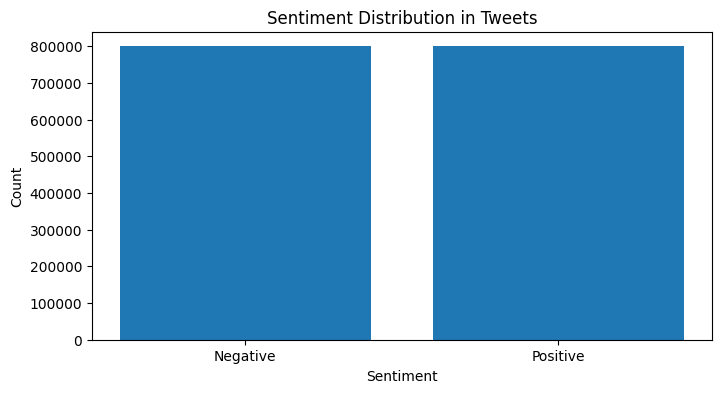

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Tweets')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.


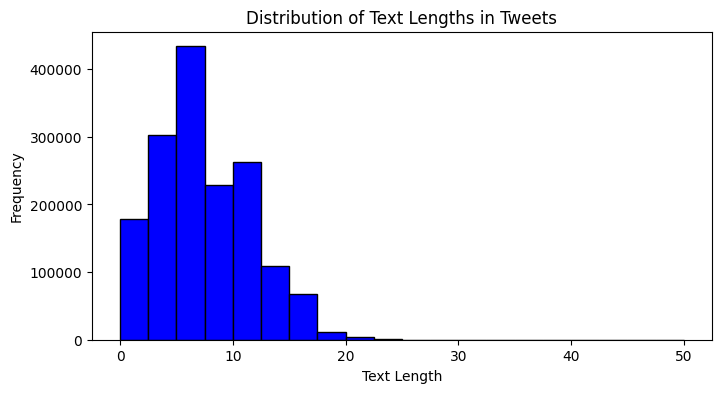

In [ ]:
import nltk
nltk.download('punkt')
# T%
df['text_length'] = df['text'].apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(8, 4))
plt.hist(df['text_length'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Tweets')
plt.show()


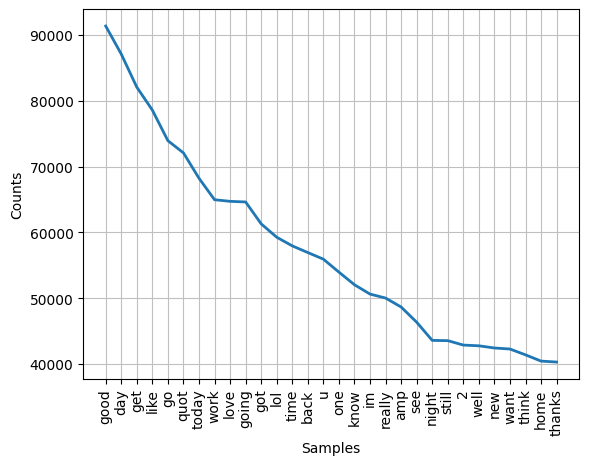

In [ ]:
# Word Frequency Analysis
all_words = ' '.join(df['text']).split()
fdist = FreqDist(all_words)
fdist.plot(30, cumulative=False)
plt.show()


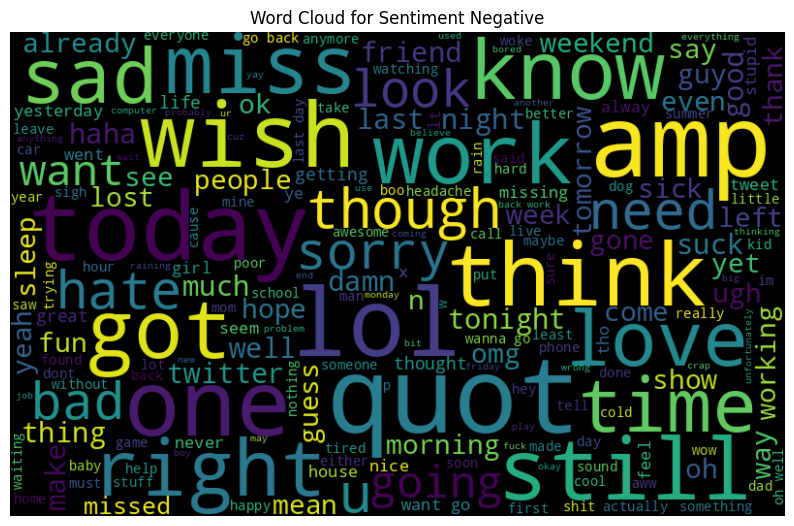

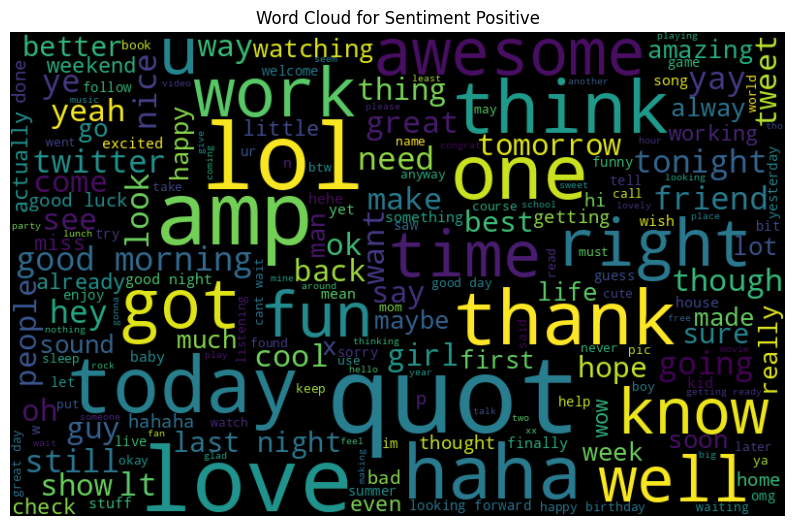

In [ ]:
# Word Clouds for each sentiment
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    text = ' '.join(subset['text'])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment {sentiment}')
    plt.show()

### Word Embedding

In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip
!y

--2023-12-21 07:08:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-21 07:08:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-21 07:08:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

glov

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Path to the GloVe file
glove_file = 'glove.6B.300d.txt'  # Update with your GloVe file path

# Load the embeddings
embeddings_index = load_glove_embeddings(glove_file)

# Assuming df is your DataFrame with columns 'text' and 'sentiment'
texts = df['text'].tolist()
labels = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0).tolist()

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
data = pad_sequences(sequences, maxlen=100)

# Preparing the embedding matrix
embedding_dim = 300  # Same as GloVe embeddings
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros.
        embedding_matrix[i] = embedding_vector



In [16]:
# Assuming df is your DataFrame with a column 'text'
texts = df['text'].tolist()

# Calculate the length of each text entry
text_lengths = [len(text.split()) for text in texts]

# Calculate the average and maximum length
average_length = sum(text_lengths) / len(text_lengths)
max_length = max(text_lengths)

print("Average Length: ", average_length)
print("Maximum Length: ", max_length)


Average Length:  7.209736875
Maximum Length:  50


In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame with columns 'text' and 'sentiment'
labels = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0).tolist()

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences to ensure uniform input size
maxlen = max_length  # You can adjust this based on the length of your tweets
data = pad_sequences(sequences, maxlen=maxlen)



In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from keras.initializers import Constant

embedding_dim = 300  # Dimension of GloVe word vectors

# Define the model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=False))  # Set trainable to False to keep the embeddings fixed
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           100652400 
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           192128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 128)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 100943473 (385.07 MB)
Trainable params: 29

In [19]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import time


# Assuming 'data' is your padded text sequences and 'labels' are your binary sentiment labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [20]:

# Model training
batch_size = 32
epochs = 5
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Early stopping to prevent overfitting
# Convert y_train and y_val to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# End the timer
end_time = time.time()

Epoch 1/5
36000/36000 [==============================] - 219s 6ms/step - loss: 0.5488 - accuracy: 0.7137 - val_loss: 0.5364 - val_accuracy: 0.7231
Epoch 2/5
36000/36000 [==============================] - 201s 6ms/step - loss: 0.5270 - accuracy: 0.7302 - val_loss: 0.5314 - val_accuracy: 0.7274
Epoch 3/5
36000/36000 [==============================] - 200s 6ms/step - loss: 0.5164 - accuracy: 0.7378 - val_loss: 0.5312 - val_accuracy: 0.7285
Epoch 4/5
36000/36000 [==============================] - 200s 6ms/step - loss: 0.5079 - accuracy: 0.7435 - val_loss: 0.5340 - val_accuracy: 0.7279
Epoch 5/5
36000/36000 [==============================] - 200s 6ms/step - loss: 0.5006 - accuracy: 0.7482 - val_loss: 0.5347 - val_accuracy: 0.7257


In [23]:

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# Model evaluation
test_loss, test_accuracy = model.evaluate(np.array(X_test),np.array( y_test))
print("Test Accuracy: ", test_accuracy)


Training Time: 1021.1380834579468 seconds
10000/10000 [==============================] - 31s 3ms/step - loss: 0.5346 - accuracy: 0.7261
Test Accuracy:  0.7260656356811523


In [24]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


10000/10000 [==============================] - 26s 3ms/step
Accuracy: 0.726065625

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71    159494
           1       0.71      0.77      0.74    160506

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.73    320000
weighted avg       0.73      0.73      0.73    320000



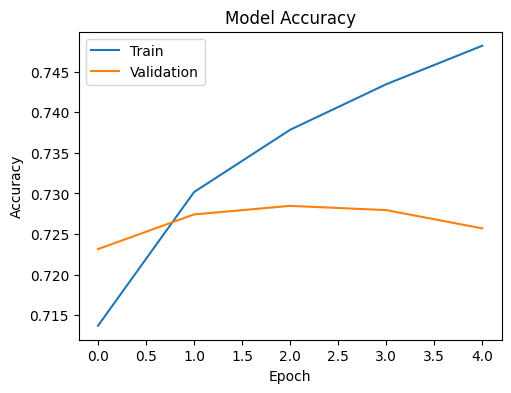

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


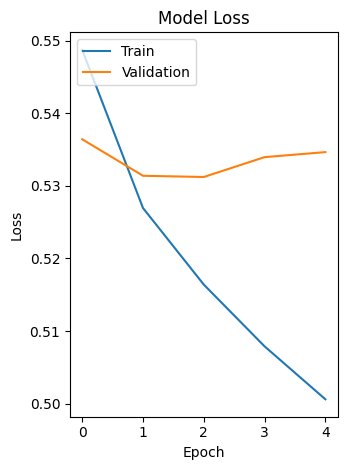

In [26]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
!pip install keras-tuner


In [36]:
from kerastuner import HyperModel
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from keras.initializers import Constant

class MyHyperModel(HyperModel):
    def __init__(self, word_index, embedding_matrix, maxlen):
        self.word_index = word_index
        self.embedding_matrix = embedding_matrix
        self.maxlen = maxlen

    def build(self, hp):
        model = Sequential()
        model.add(Embedding(len(self.word_index) + 1,
                            embedding_dim,
                            embeddings_initializer=Constant(self.embedding_matrix),
                            input_length=self.maxlen,
                            trainable=False))

        model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32),
                         kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
                         activation='relu'))
        model.add(MaxPooling1D(5))
        model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32))))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(
    optimizer=tf.keras.optimizers.Adam(
        hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
    loss='binary_crossentropy',
    metrics=['accuracy'])
        return model


In [44]:
from kerastuner.tuners import RandomSearch

hypermodel = MyHyperModel(word_index, embedding_matrix, maxlen)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hparam_tuning'
)

tuner.search(X_train, y_train,
             epochs=3,
             validation_data=(X_val, y_val))


Trial 4 Complete [00h 10m 34s]
val_accuracy: 0.6151328086853027

Best val_accuracy So Far: 0.648562490940094
Total elapsed time: 00h 10m 34s


In [45]:
best_model = tuner.get_best_models(num_models=1)[0]


TypeError: BaseTuner.get_best_hyperparameters() got an unexpected keyword argument 'num_models'

In [50]:
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_hyperparameters

In [46]:
predictions = best_model.predict(X_test)

# Convert predictions to binary outcomes
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]


10000/10000 [==============================] - 26s 3ms/step


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
roc_auc = roc_auc_score(y_test, predictions)  # Use the raw predictions here

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6471125
Precision: 0.6215563049254036
Recall: 0.757921822237175
F1 Score: 0.6829989950200154
ROC AUC: 0.7135527302416733
Confusion Matrix:
[[ 85425  74069]
 [ 38855 121651]]


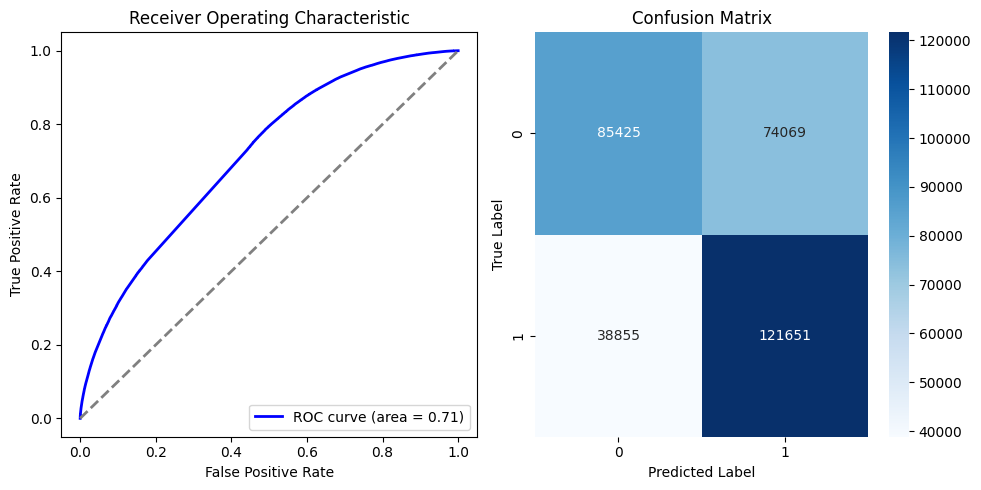

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Assuming you have these variables defined:
# y_test: Actual labels from your test set
# binary_predictions: Predicted labels from your model (as binary classes)
# predictions: Raw predictions (probabilities) from your model

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

# Plotting the ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Confusion Matrix
cm = confusion_matrix(y_test, binary_predictions)

# Plotting the Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()